# Requirements for supervised Learning

1. No missing values
2. Data in numeric format
3. Data stored in pandas dataframe or NumPy array

In [21]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Scikit-Learn syntax

In [ ]:
from sklearn.module import Model

model = Model()

model.fit(X, y)

predictions = model.predict(X_new)

print(predictions)

In [1]:
# get working directory path
os.getcwd()

'C:\\Users\\George\\Documents\\Projects-2024\\Machine-Learning-Project\\Supervised-Learning-with-Scikit-Learn'

In [1]:

churn_df = pd.read_csv("telecom_churn_clean.csv")
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:

# define independent variables for training the algorithm as numpy arrays
X = churn_df[["total_day_charge", "total_eve_charge"]].values

# Define target variable to predict as a numpy array
y = churn_df["churn"].values

# shape of X and y
print(f"Shape of X is: {X.shape} and shape of y is: {y.shape}")

Shape of X is: (3333, 2) and shape of y is: (3333,)


In [4]:
# Instantial our knn classifier with 15 k neighbors
knn = KNeighborsClassifier(n_neighbors=15)

# fit algorithm to our data
knn.fit(X=X, y=y)

KNeighborsClassifier(n_neighbors=15)

In [5]:

# Define new values to predict
X_new = np.array(
    [
        [56.8, 17.5], [24.4, 24.1], [50.1, 10.9]
    ]
)

print(f"Shape of X_new is {X_new.shape}")

Shape of X_new is (3, 2)


In [6]:
# predict
predictions = knn.predict(X=X_new)
print(f"Predictions: {predictions}")

Predictions: [1 0 0]


In [6]:
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [7]:

X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


# Measuring Performance

### Train/Test Split

In [9]:

# train_test_split returns 4 arrays
X_train, X_test, y_train, y_test = train_test_split(
    X, # features
    y, # target
    # use 30% of the data as testing set
    test_size=0.3, 
    # set a seed for random number generator (allows reproducibility)
    random_state=21, 
    # ensure splits reflects the proportion of labels in the data
    stratify=y
)

# instantiate the KNN algorithm
knn = KNeighborsClassifier(n_neighbors=6)

# fit algorithm to our data 
knn.fit(X_train, y_train)

# measure performance
accuracy = knn.score(X_test, y_test)
print(f"The accuracy of our classifier is: {accuracy * 100}%")

The accuracy of our classifier is: 85.2%


Let's discuss how to interpret k. Recall that we discussed decision boundaries, which are thresholds for determining what label a model assigns to an observation. In the image shown, as k increases, the decision boundary is less affected by individual observations, reflecting a simpler model. Simpler models are less able to detect relationships in the dataset, which is known as underfitting. In contrast, complex models can be sensitive to noise in the training data, rather than reflecting general trends. This is known as overfitting.

9. Model complexity and over/underfitting

We can also interpret k using a model complexity curve. With a KNN model, we can calculate accuracy on the training and test sets using incremental k values, and plot the results. We create empty dictionaries to store our train and test accuracies, and an array containing a range of k values. We use a for loop to repeat our previous workflow, building several models using a different number of neighbors. We loop through our neighbors array and, inside the loop, we instantiate a KNN model with n_neighbors equal to the neighbor iterator, and fit to the training data. We then calculate training and test set accuracy, storing the results in their respective dictionaries.

In [18]:
train_accuracies = {}
test_accuracies = {}

# an array of k values
neighbors = np.arange(1, 26)
print(neighbors)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [32]:
# Loop over k values building different models for each k value
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    
    # train and test sets accuracies
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Plotting the results

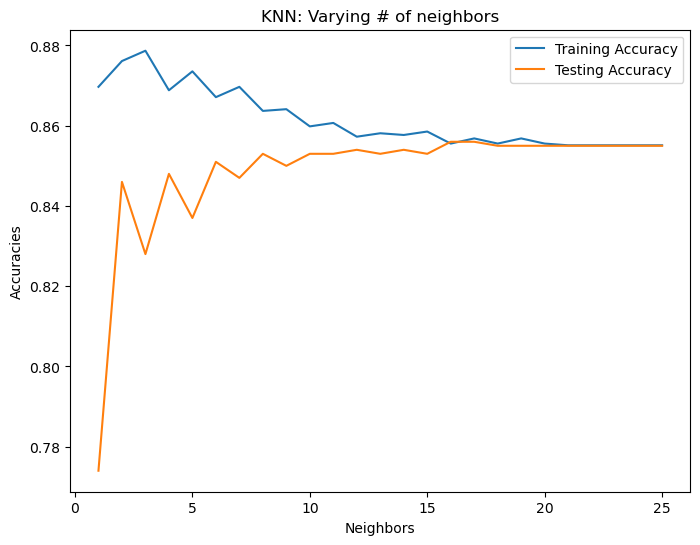

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Accuracies")
plt.title("KNN: Varying # of neighbors")
plt.show()

As k increases beyond 15 we see underfitting where performance plateaus on both test and training sets, as indicated in this plot.